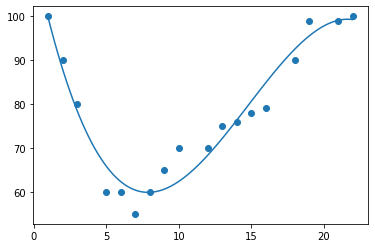

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [41]:
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from matplotlib import pyplot as plt
import numpy as np

In [42]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=25,
    coef=True,
    random_state=1
)

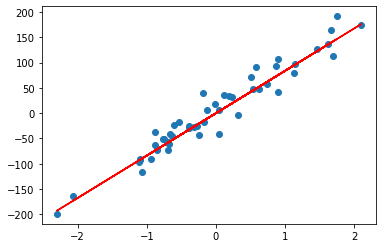

In [43]:
rr = Lasso(alpha=1)
rr.fit(X, y)
w = rr.coef_[0]
plt.scatter(X, y)
plt.plot(X, w*X, c='red')

### Implementation of Lasso regression.

We do it using gradient descent and use the MSE loss.

$$
    \sum_{n from N}{\frac{1}{2}(y_{n} - y_{pred(n)})^{2}} + l * \sum_{i from P}{|b_{i}|}
$$

If we calculate the partial derivative of the loss w.r.t each b, we get this formula for each data point.

$$
    b_{n} += (y_{i} - BX)*X_{i} + l * lasso(b)
$$

where, we define lasso(x) to be equal to 1 if x is positive, -1 when x is negative and generate a number from gaussian distribution with mean zeros and some low standard deviation, when it is 0(since it does not have derivative at 0)

In [54]:
# absolute value derivative
def defined_abs_der(x):
    x = x.copy()
    x[np.where(x < 0)] = -1
    x[np.where(x > 0)] = 1
    x[np.where(x == 0)] = np.random.normal(0, 0.1, 1)
    return x


def fit_1d_lasso_regression(X_t, y_t, n_iterations=100, lr=0.001, lmb=0.1):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """    
    #TODO
    b = np.random.normal(0, 1, X.shape[1])
    b[np.where(b == 0)] = 1e-10
    b0 = np.random.normal(0, 1, 1)
    b0[np.where(b == 0)] = 1e-10
#     print(b, b0)
    
    for i in range(n_iterations):
        A = np.dot(b, X_t.T) + b0
        
        for j, a in enumerate(A):
            b += lr * ((y_t[j] - a) * X_t[j] + lmb * defined_abs_der(b))
            b0 += lr * ((y_t[j] - a) + lmb * defined_abs_der(b0))
    
    return np.append(b0, b)


def predict(X_t, beta):
    return np.dot(beta[1:], X_t.T) + beta[0]

In [47]:
fit_1d_lasso_regression(X, y)

array([ 5.45195027, 84.33330667])

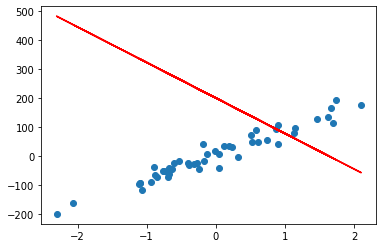

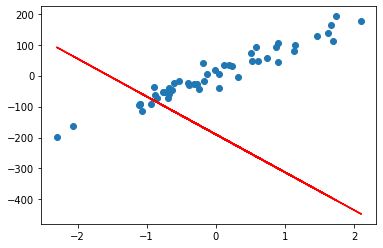

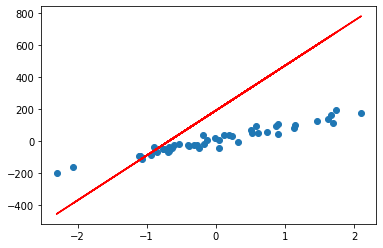

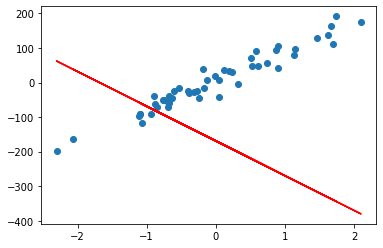

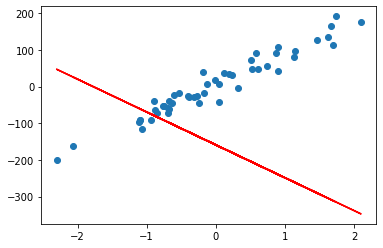

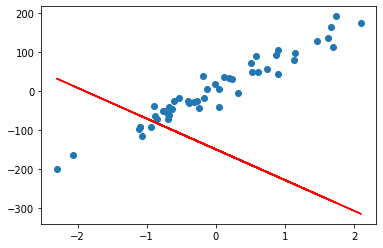

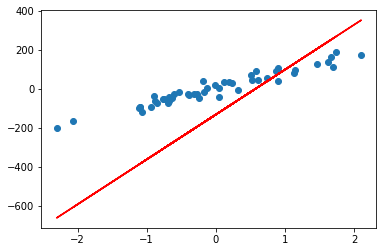

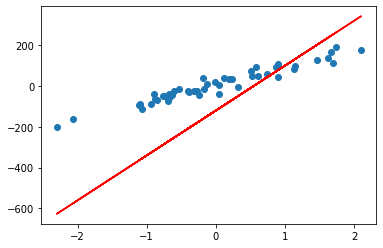

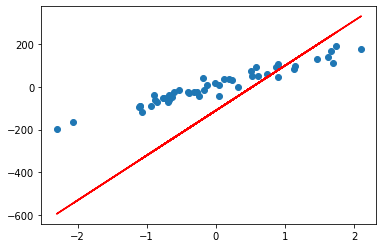

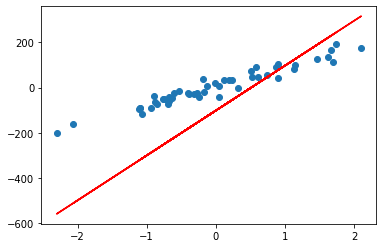

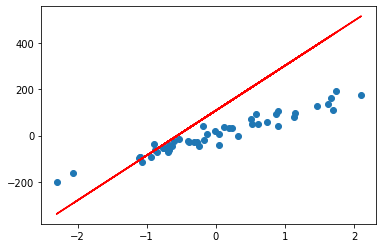

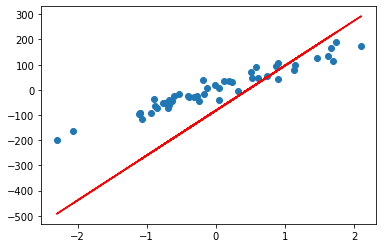

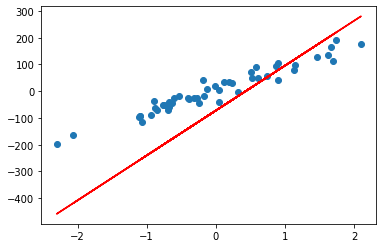

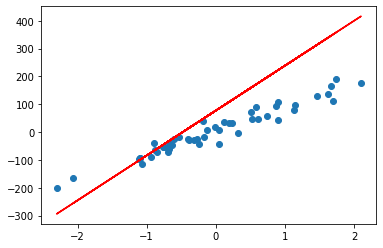

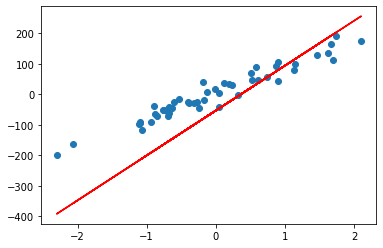

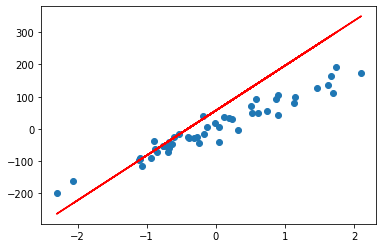

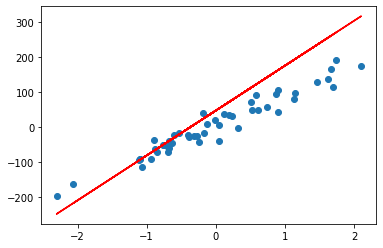

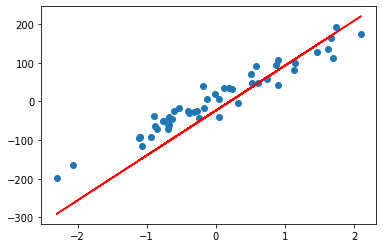

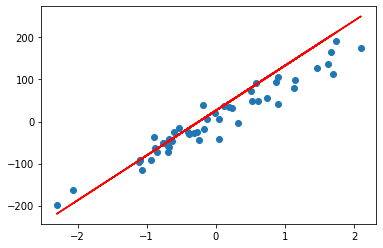

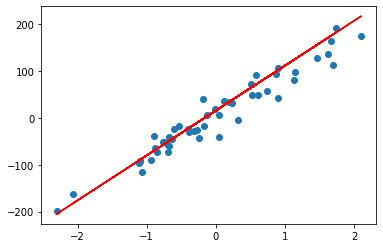

In [48]:
for lmb in range(200, 0, -10):
    w = fit_1d_lasso_regression(X, y, lr=0.01, lmb=lmb)
    plt.scatter(X, y)
    plt.plot(X, w[0]+w[1]*X, c='red')
    plt.show()

### apply models to some data

In [49]:
# load and summarize the housing dataset
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
# summarize shape
# print(dataframe.shape)
# summarize first few lines
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [50]:
X = dataframe[dataframe.columns.difference([13])]
y = dataframe[13]

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
beta = fit_1d_lasso_regression(X_train.values, y_train.values, n_iterations=10, lr=1e-21, lmb=200)
beta

array([-1.9645524 ,  0.44916144,  1.06463219, -0.36333703,  1.45340358,
       -0.22348854,  0.76479092,  0.06898677, -0.04343908,  0.50849919,
        0.20465027,  0.77813278,  0.32621464, -0.52733206])

In [61]:
mean_squared_error(y_test, predict(X_test, beta))

46149.807915555575